In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nips-2015-papers/hashes.txt
/kaggle/input/nips-2015-papers/accepted_papers.html
/kaggle/input/nips-2015-papers/database.sqlite
/kaggle/input/nips-2015-papers/PaperAuthors.csv
/kaggle/input/nips-2015-papers/Papers.csv
/kaggle/input/nips-2015-papers/Authors.csv


In [107]:
import pandas as pd
authors = pd.read_csv("../input/nips-2015-papers/Authors.csv")
paper_authors = pd.read_csv("../input/nips-2015-papers/PaperAuthors.csv")
papers = pd.read_csv("../input/nips-2015-papers/Papers.csv")

**Sample view on each dataframes**

In [108]:
authors.head(5)

,Id,Name
0,3967,Yi Zhang
1,3087,Aurelie C. Lozano
2,3039,Dustin Lang
3,6551,Xinghao Pan
4,8262,Theophane Weber


In [109]:
paper_authors.head(5)

,Id,PaperId,AuthorId
0,1,5677,7956
1,2,5677,2649
2,3,5941,8299
3,4,5941,8300
4,5,5941,575


In [110]:
papers.describe()

,Id
count,403.000000
mean,5834.000000
std,116.480327
min,5633.000000
25%,5733.500000
50%,5834.000000
75%,5934.500000
max,6035.000000


In [111]:
papers.head(5)

,Id,Title,EventType,PdfName,Abstract,PaperText
0,5677,Double or Nothing: Multiplicative Incentive Me...,Poster,5677-double-or-nothing-multiplicative-incentiv...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\nIncentive M...
1,5941,Learning with Symmetric Label Noise: The Impor...,Spotlight,5941-learning-with-symmetric-label-noise-the-i...,Convex potential minimisation is the de facto ...,Learning with Symmetric Label Noise: The\nImpo...
2,6019,Algorithmic Stability and Uniform Generalization,Poster,6019-algorithmic-stability-and-uniform-general...,One of the central questions in statistical le...,Algorithmic Stability and Uniform Generalizati...
3,6035,Adaptive Low-Complexity Sequential Inference f...,Poster,6035-adaptive-low-complexity-sequential-infere...,We develop a sequential low-complexity inferen...,Adaptive Low-Complexity Sequential Inference f...
4,5978,Covariance-Controlled Adaptive Langevin Thermo...,Poster,5978-covariance-controlled-adaptive-langevin-t...,Monte Carlo sampling for Bayesian posterior in...,Covariance-Controlled Adaptive Langevin\nTherm...


**HIGH LEVEL APPROACH**
1. > Text PreProcessing
       a.Noise Removal
       b.Normalisation
2. > Data Exploration
       a.Word cloud to understand frequently used words
       b.Top 20 unigrams,bi-grams,tri-grams
3. > Convert text to a vector of word counts  
4. > Covert text to a vector of term frequencies
5. > Sort terms based on term frequencies in descending order to identify top N keywords

> Before preprocessing,it is advisable to explore dataset in terms of word count,most common and uncommon words 

In [112]:
papers.isnull().describe()

,Id,Title,EventType,PdfName,Abstract,PaperText
count,403,403,403,403,403,403
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,403,403,403,403,403,403


> Dropping Event type column as it has no relevance at all.

In [113]:
papers.drop(['EventType'],axis=1,inplace=True)
papers

,Id,Title,PdfName,Abstract,PaperText
0,5677,Double or Nothing: Multiplicative Incentive Me...,5677-double-or-nothing-multiplicative-incentiv...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\nIncentive M...
1,5941,Learning with Symmetric Label Noise: The Impor...,5941-learning-with-symmetric-label-noise-the-i...,Convex potential minimisation is the de facto ...,Learning with Symmetric Label Noise: The\nImpo...
2,6019,Algorithmic Stability and Uniform Generalization,6019-algorithmic-stability-and-uniform-general...,One of the central questions in statistical le...,Algorithmic Stability and Uniform Generalizati...
3,6035,Adaptive Low-Complexity Sequential Inference f...,6035-adaptive-low-complexity-sequential-infere...,We develop a sequential low-complexity inferen...,Adaptive Low-Complexity Sequential Inference f...
4,5978,Covariance-Controlled Adaptive Langevin Thermo...,5978-covariance-controlled-adaptive-langevin-t...,Monte Carlo sampling for Bayesian posterior in...,Covariance-Controlled Adaptive Langevin\nTherm...
...,...,...,...,...,...
398,5792,Efficient Learning of Continuous-Time Hidden M...,5792-efficient-learning-of-continuous-time-hid...,The Continuous-Time Hidden Markov Model (CT-HM...,Efficient Learning of Continuous-Time Hidden\n...
399,5674,Expectation Particle Belief Propagation,5674-expectation-particle-belief-propagation.pdf,We propose an original particle-based implemen...,Expectation Particle Belief Propagation\n\nThi...
400,5756,Latent Bayesian melding for integrating indivi...,5756-latent-bayesian-melding-for-integrating-i...,"In many statistical problems, a more coarse-gr...",Latent Bayesian melding for integrating indivi...
401,5745,Distributionally Robust Logistic Regression,5745-distributionally-robust-logistic-regressi...,This paper proposes a distributionally robust ...,Distributionally Robust Logistic Regression\n\...


> Words of each abstract are counted

In [114]:
papers['word_count']=papers['Abstract'].apply(lambda x:len(str(x).split(" ")))
papers[['Abstract','word_count']].head()

,Abstract,word_count
0,Crowdsourcing has gained immense popularity in...,154
1,Convex potential minimisation is the de facto ...,146
2,One of the central questions in statistical le...,168
3,We develop a sequential low-complexity inferen...,122
4,Monte Carlo sampling for Bayesian posterior in...,117


In [115]:
papers.word_count.describe()

count    403.000000
mean     148.650124
std       42.919155
min       58.000000
25%      119.000000
50%      145.000000
75%      177.500000
max      296.000000
Name: word_count, dtype: float64

> It indicate that average count for each word is 149 words per abstract.Min words per abstract is 58 and maximum words are 296 words.The word count is important to give us an indication of the size of the dataset that we are handling as well as the variation in word counts across the rows

> **Frequently used words**

In [116]:
freq = pd.Series(' '.join(papers['Abstract']).split()).value_counts()[:20]
freq

the      3086
of       2106
a        1602
and      1415
to       1342
in        931
is        815
for       769
that      765
We        589
on        567
we        514
with      455
as        392
an        376
are       370
this      361
which     314
by        314
our       291
dtype: int64

> **Uncommon Words**

In [117]:
non_freq = pd.Series(' '.join(papers['Abstract']).split()).value_counts()[-20:]
non_freq

``doubly                   1
particle-based             1
Second                     1
(SoS,                      1
polynomially               1
robust/average-case        1
incorporating              1
$k$-means                  1
batches                    1
(SMP).                     1
PI                         1
razor                      1
expense                    1
ultrametric                1
end                        1
stronger                   1
halting                    1
feasible,                  1
possible.This              1
\underline{R}egularized    1
dtype: int64

> **Text Pre-Processing **
> Objectives
1. Text Clean Up
2. Shrinking the vocabulary to retain only relevant/important words
3. Reduce sparsity

> Noise Removal can be done by removing redundant text components like Punctuation,Tags,URLs
> Normalization can be done by Lemmatization which works based on the root of the world and Stemming that removes suffixes

In [118]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "good"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: good
lemmatization: good


> The stemming and lemmatizaton of most of the nouns are same as that of words itself.


In [119]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

> Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences. These words need to be removed before we analyse the text, so that the frequently used words are mainly the words relevant to the context and not common words used in the text.

> There is a default list of stopwords in python nltk library. In addition, we might want to add context specific stopwords for which the “most common words” that we listed in the beginning will be helpful.

In [120]:
##Creating a list of stopwords and adding a custom list of stopwords
stop_words=set(stopwords.words('english'))
print(stop_words)

{"wouldn't", 'is', 'them', 'do', 's', 'shouldn', 'did', 'as', 'over', 'few', 'ain', 't', 'again', 'an', 'into', 'are', 'off', 'doing', "aren't", 'herself', 'hasn', "you've", 'his', 'no', "mightn't", 'its', "it's", 'from', 'if', 'whom', 'we', 'having', 'same', 'needn', "wasn't", 'don', 'it', 'between', 're', 'but', 'when', 'these', 'not', 'the', 'there', 'have', 'hadn', 'that', 'here', "you're", 've', 'll', 'ma', "shan't", "mustn't", 'couldn', 'further', "weren't", 'now', 'down', 'd', 'he', 'with', 'in', 'both', "won't", 'ourselves', 'own', 'too', 'how', 'above', "haven't", 'shan', 'because', 'nor', 'or', "hasn't", 'weren', 'after', 'wouldn', 'each', 'you', 'themselves', 'who', 'me', 'didn', 'itself', 'those', 'on', "doesn't", 'mightn', 'most', 'does', 'y', 'my', 'am', 'than', 'was', 'where', 'for', 'himself', "should've", 'has', "didn't", 'during', 'once', "couldn't", 'can', 'yourself', 'isn', 'more', 'mustn', 'any', 'they', 'while', 'why', 'wasn', 'all', "isn't", 'just', "hadn't", 'be

In [121]:
##Creating a list of custom stopwords
new_words= ["using", "show", "result", "large", "also",
            "iv", "one", "two", "new", "previously", "shown"]
stop_words=stop_words.union(new_words)

**Preprocessing Text**

In [122]:
corpus=[]
for i in range(0,403):
    #remove punctuations
    text=re.sub('^[a-zA-Z]',' ',papers.Abstract[i])
    #convert to lower case
    text=text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    #remove special characters and digits
    text=re.sub('(\\d|\\W)',' ',text)
    #Convert to list from string
    list=text.split()
    #Stemming
    ps=PorterStemmer()
    #Lemmatization
    lem=WordNetLemmatizer()
    temp=[lem.lemmatize(word) for word in list if word not in stop_words]
    text=" ".join(temp)
    corpus.append(text)
    

**Data Visualisation**

In [124]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

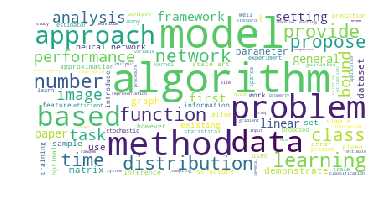

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(background_color='white',stopwords=stop_words,
                                        max_words=100,
                                        max_font_size=50, 
                                        random_state=42 #near to std_dev
                                        ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

> Tokenisation is the process of converting the continuous text into a list of words. The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.

**CountVectoriser to tokenise the text and build a vocabulary of known words.**
>     cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
    max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.
    max_features — determines the number of columns in the matrix.
    n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)


[Text(0, 0, 'algorithm'),
 Text(0, 0, 'model'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'method'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'data'),
 Text(0, 0, 'network'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'based'),
 Text(0, 0, 'time'),
 Text(0, 0, 'bound'),
 Text(0, 0, 'function'),
 Text(0, 0, 'result'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'inference'),
 Text(0, 0, 'number'),
 Text(0, 0, 'performance'),
 Text(0, 0, 'matrix')]

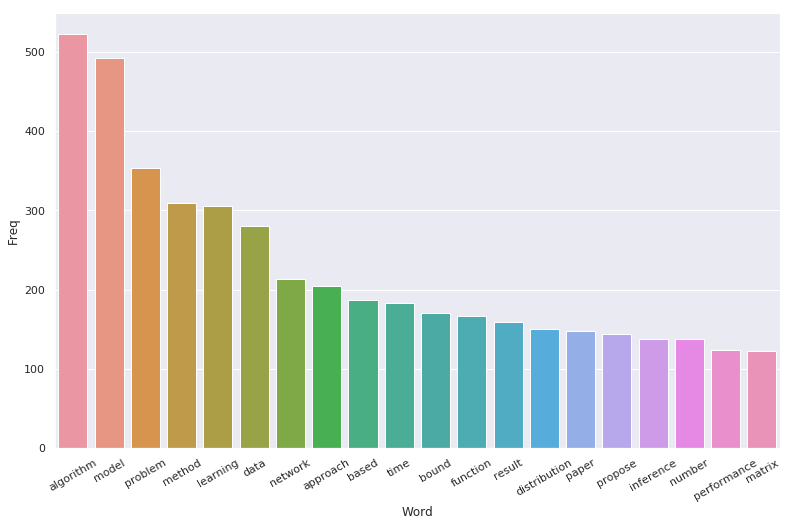

In [151]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                  Bi-gram  Freq
0          neural network    76
1               state art    70
2        machine learning    55
3              real world    46
4             lower bound    42
5     stochastic gradient    38
6                low rank    38
7        high dimensional    36
8      learning algorithm    34
9             monte carlo    30
10       gradient descent    28
11       convergence rate    28
12       generative model    24
13        latent variable    23
14       learning problem    23
15  variational inference    22
16          paper present    22
17          paper propose    21
18               data set    20
19           markov chain    20


[Text(0, 0, 'neural network'),
 Text(0, 0, 'state art'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'stochastic gradient'),
 Text(0, 0, 'low rank'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'monte carlo'),
 Text(0, 0, 'gradient descent'),
 Text(0, 0, 'convergence rate'),
 Text(0, 0, 'generative model'),
 Text(0, 0, 'latent variable'),
 Text(0, 0, 'learning problem'),
 Text(0, 0, 'variational inference'),
 Text(0, 0, 'paper present'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'markov chain')]

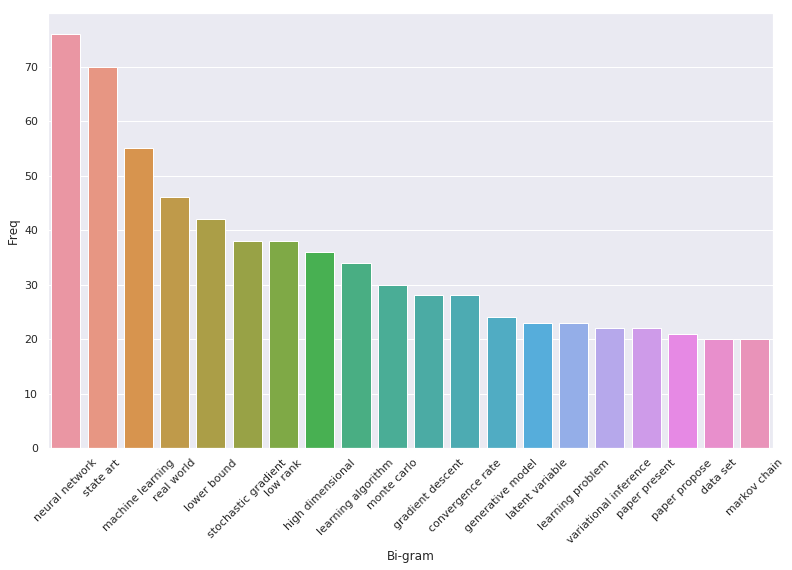

In [154]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0   convolutional neural network    16
1            deep neural network    15
2                low rank matrix    15
3            real world datasets    13
4       recurrent neural network    12
5           synthetic real world    11
6          latent variable model     9
7             multi armed bandit     9
8               state art method     8
9             markov chain monte     8
10             chain monte carlo     8
11   stochastic gradient descent     8
12         state art performance     8
13           hidden markov model     8
14        real world application     8
15   empirical risk minimization     8
16             current state art     7
17      high dimensional setting     7
18         outperforms state art     6
19          armed bandit problem     6


[Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'deep neural network'),
 Text(0, 0, 'low rank matrix'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'synthetic real world'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'multi armed bandit'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'stochastic gradient descent'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'hidden markov model'),
 Text(0, 0, 'real world application'),
 Text(0, 0, 'empirical risk minimization'),
 Text(0, 0, 'current state art'),
 Text(0, 0, 'high dimensional setting'),
 Text(0, 0, 'outperforms state art'),
 Text(0, 0, 'armed bandit problem')]

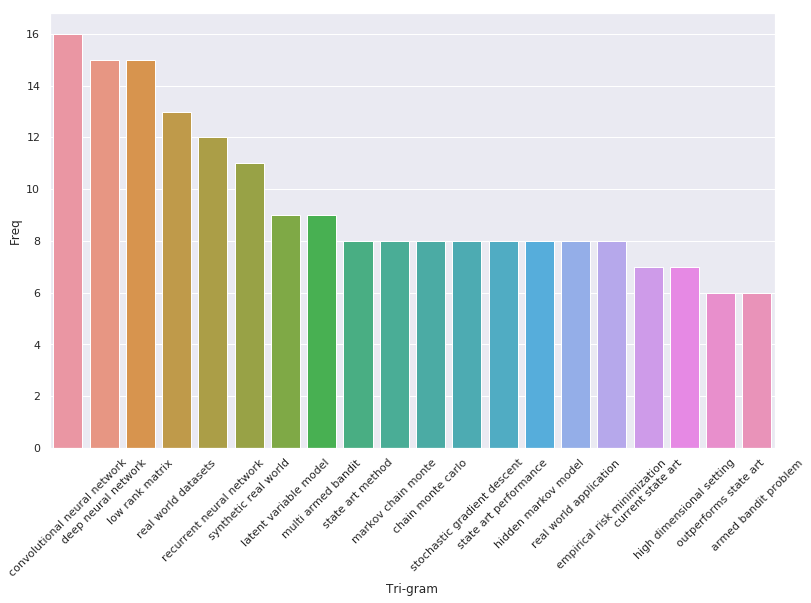

In [156]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

Converting to a matrix of integers

The next step of refining the word counts is using the TF-IDF vectoriser. The deficiency of a mere word count obtained from the countVectoriser is that, large counts of certain common words may dilute the impact of more context specific words in the corpus. This is overcome by the TF-IDF vectoriser which penalizes words that appear several times across the document. TF-IDF are word frequency scores that highlight words that are more important to the context rather than those that appear frequently across documents.

TF-IDF consists of 2 components:

    TF — term frequency
    IDF — Inverse document frequency
    TF=Freq of terms/total no of terms
    IDF=log(total documents)/number of documents with the term
    

In [161]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[123]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [163]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
n important class problem involves training deep neural network sparse prediction target high dimension occur naturally e g neural language model learning word embeddings often posed predicting probability next word among vocabulary size e g computing equally typically non sparse dimensional output vector last hidden layer reasonable dimension e g incurs prohibitive dd computational cost example updating time output weight matrix computing gradient needed backpropagation previous layer efficient handling sparse network input trivial case sparse target thus far sidestepped approximate alternative hierarchical softmax sampling based approximation training work develop original algorithmic approach family loss function includes squared error spherical softmax compute exact loss gradient update output weight gradient backpropagation per example instead dd remarkably without ever computing dimensional output proposed algorithm yield speedup frac e order magnitude typical size cri

Ideally for the IDF calculation to be effective, it should be based on a large corpora and a good representative of the text for which the keywords need to be extracted. In our example, if we use the full article text instead of the abstracts, the IDF extraction would be much more effective. However, considering the size of the dataset, I have limited the corpora to just the abstracts for the purpose of demonstration.

This is a fairly simple approach to understand fundamental concepts of NLP and to provide a good hands-on practice with some python codes on a real-life use case. The same approach can be used to extract keywords from news feeds & social media feeds.